In [ ]:
!pip install --quiet --upgrade accelerate
!pip install git+https://github.com/huggingface/diffusers.git@main
!pip install controlnet_hinter==0.0.5

In [ ]:
import controlnet_hinter

# Khai báo các phương thức Controlnett

CONTROLNET_MAPPING = {

    "canny_edge": {
        "model_id": "lllyasviel/sd-controlnet-canny",
        "hinter": controlnet_hinter.hint_canny
    },
   "pose": {
        "model_id": "lllyasviel/sd-controlnet-openpose",
        "hinter": controlnet_hinter.hint_openpose
    },

}

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch
from google.colab import userdata

device = "cuda"
controlnet_type = "canny_edge"
# controlnet_type = "pose"

# Stable diffusion base model
base_model_path =  "digiplay/Juggernaut_final"
# base_model_path = "Lykon/DreamShaper"

# Loading the base model with ControlNet
controlnet = ControlNetModel.from_pretrained(CONTROLNET_MAPPING[controlnet_type]["model_id"], torch_dtype=torch.float16).to(device)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
     base_model_path ,
     controlnet=controlnet,
     torch_dtype=torch.float16, token=userdata.get('hugg_token')
    ).to(device)

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/593 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/427 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.58k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/582 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

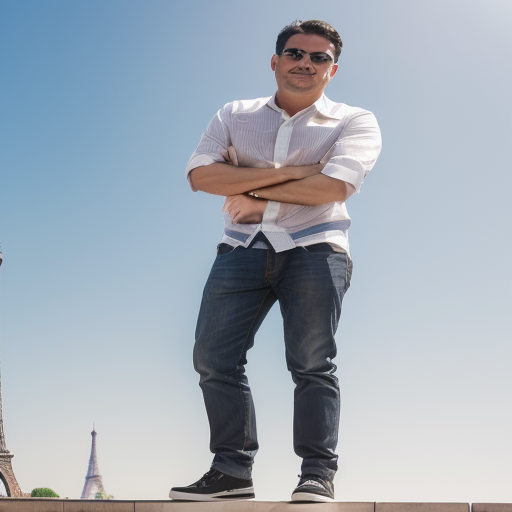

In [ ]:
import torch
from diffusers.utils import load_image

# Set your prompt, negative prompt, steps, and guidance scale
prompt = "Colorful, city in the background, detailed, hd, 4k, red shirt with white ball, sunset, stand beside car, low camera, face mask, sun glasses, thin man"
prompt = "4k, real ratio, man small then tower, Realistic photo of a man standing under the Eiffel Tower in Paris. The man should be dressed casually, with a clear view of the Eiffel Tower in the background, The sky is clear and sunny, and there are a few tourists around, "
negative_prompt = "lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality"

no_of_steps = 20

# Do sang tao cua model
guidace_scale = 7.0

# Do anh huong cua controlnet
controlnet_conditioning_scale=1.0

# load image
logo_image = load_image("man.jpg")

# convert it into a control image
control_image = CONTROLNET_MAPPING[controlnet_type]["hinter"](logo_image )

# run the inference,
my_images = pipe(
    prompt=prompt,
    width=512,
    height=512,
    negative_prompt=negative_prompt,
    image=control_image,
    controlnet_conditioning_scale=controlnet_conditioning_scale,
    num_inference_steps=no_of_steps,
    guidance_scale=guidace_scale,
)

# get first image from the image generations object.
output_image = my_images.images[0]

# shows the generated control image
# control_image
output_image

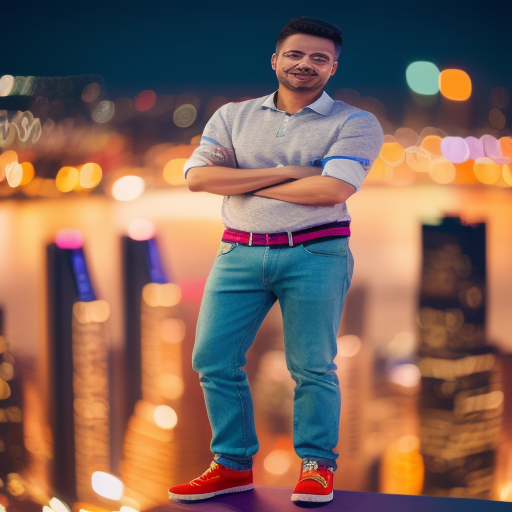

In [ ]:
first_image

Text(0.5, 1.0, 'Generated')

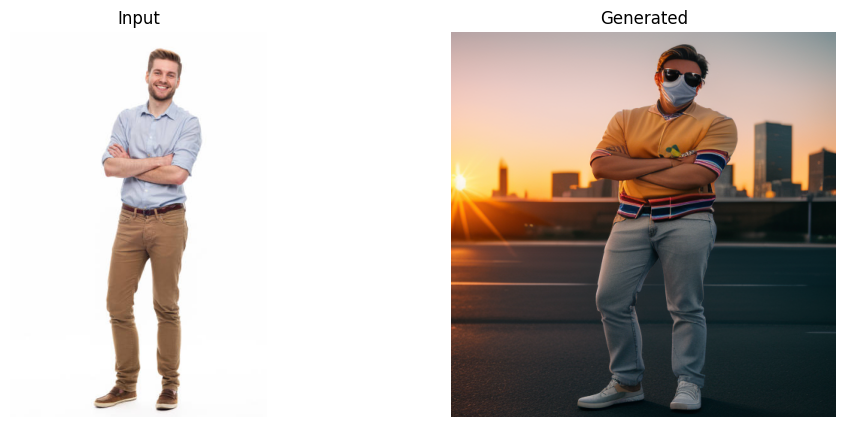

In [ ]:
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(25, 5))

# setting values to rows and column variables
rows = 1
columns = 4

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(logo_image)
plt.axis('off')
plt.title("Input")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(first_image)
plt.axis('off')
plt.title("Generated")
